# Newton's

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
import math
import pandas as pd
import scipy
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
from scipy import stats
import sympy as sy

### Problem 1

In [5]:
def p_1(f, x_0, f_prime, tol=10e-5, maxiters=15):
    x_k = x_0
    dist = 10.0
    iters = 0
    converge = False
    while converge == False and iters < maxiters:
        x_kp1 = x_k - f(x_k)/f_prime(x_k)
        dist = x_kp1 - x_k
        if np.abs(dist) < tol:
            converge = True
        x_k = x_kp1
        iters += 1
    return x_k, converge, iters

In [6]:
def f_1(x):
    output = np.exp(x) -2
    return output

def f_1_prime(x):
    output = np.exp(x)
    return output

In [7]:
p_1(f_1, 2.0, f_1_prime)

(0.6931471814512683, True, 5)

### Problem 2

In [8]:
def f_2(r):
    N1 = 30
    N2 = 20
    P1 = 2000
    P2 = 8000
    output = P1*((1+r)**N1 - 1) - P2*(1-(1+r)**(-N2))
    return output

def f_2_prime(r):
    N1 = 30
    N2 = 20
    P1 = 2000
    P2 = 8000
    output = P1*N1*(1 + r)**(N1 - 1) - P1 - P2 + N2*P2*(1 + r)**(-N2 - 1)
    return output

In [9]:
p_1(f_2, 0.1, f_2_prime)

(0.03888406054094741, True, 10)

### Problem 3

In [10]:
def p_3(f, x_0, f_prime, tol=10e-5, maxiters=15, alpha=1):
    x_k = x_0
    dist = 10.0
    iters = 0
    converge = False
    while converge == False and iters < maxiters:
        x_kp1 = x_k - alpha*f(x_k)/f_prime(x_k)
        dist = x_kp1 - x_k
        if np.abs(dist) < tol:
            converge = True
        x_k = x_kp1
        iters += 1
    return x_k, converge, iters

In [11]:
f_3 = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f_3_prime = lambda x: (1./3)*np.power(np.abs(x), -2./3)

In [12]:
p_3(f_3, 0.01, f_3_prime)

(-327.6800000000003, False, 15)

In [13]:
p_3(f_3, 0.01, f_3_prime, tol = 10e-10, maxiters = 50, alpha=0.4)

(4.096000000000262e-11, True, 12)

In [14]:
f_3(4.096e-11)

0.00034470955040510155

### Problem 4

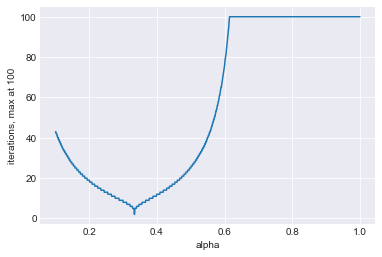

In [15]:
alpha_dom = np.linspace(0.1, 1.0, 1000)

iter_vec = np.zeros(1000)

for i in range(len(alpha_dom)):
    x_k, con, iters = p_3(f_3, 0.01, f_3_prime, tol=10e-10, maxiters = 100, alpha = alpha_dom[i])
    iter_vec[i] = iters
    
plt.plot(alpha_dom, iter_vec)
plt.xlabel('alpha')
plt.ylabel('iterations, max at 100')
plt.show()

### Problem 5

In [89]:
def err_5(y_k, errargs):
    f, x_k, f_prime = errargs
    errors = f_prime(x_k) @ y_k.reshape((len(x_k), 1)) - f(x_k).reshape((len(x_k), 1))
    return errors.flatten()

In [90]:
def p_5(f, x_0, f_prime, tol=10e-5, maxiters=15, alpha=1):
    if np.isscalar(x_0) == True:
        x_k, converge, iters = p_3(f, x_0, f_prime, tol, maxiters, alpha)
    else:
        x_k = x_0
        dist = 10.0
        iters = 0
        converge = False
        while converge == False and iters < maxiters:
            results = opt.root(err_5, np.ones(len(x_k)).reshape((len(x_k), 1)), [f, x_k, f_prime])
            y_k = results.x
            x_kp1 = x_k - alpha*y_k
            dist = x_kp1 - x_k
            if np.linalg.norm(dist) < tol:
                converge = True
            x_k = x_kp1
            iters += 1
    return x_k, converge, iters

In [92]:
def f_5_prime(x):
    output = np.diag(f_3_prime(x))
    return output

In [97]:
x_5 = np.array([1, 2])
p_5(f_3, x_5, f_5_prime, alpha=0.3)

(array([1.e-06, 2.e-06]), True, 6)

### Problem 6

In [100]:
def f_6(x):
    gamma, delta = 5.0, 1.0
    output = np.zeros(2)
    output[0] =  gamma*x[0]*x[1] - x[0]*(1 + x[1])
    output[1] = -x[0]*x[1] + (delta - x[1])*(1 + x[1])
    return output

def f_6_prime(x):
    gamma, delta = 5.0, 1.0
    output = np.zeros((2,2))
    output[0, 0] = gamma*x[1] - (1 + x[1])
    output[0, 1] = gamma*x[0] - x[0]
    output[1, 0] = -x[1]
    output[1, 1] = -x[0] + delta - 1 - 2*x[1]
    return output

In [105]:
one, two, three = p_5(f_6, x_5, f_6_prime, alpha=0.4, maxiters = 100) #check function is OK
one[1]

1.000056996097502

In [142]:
def p_6_err(N):
    dom_1 = np.linspace(-0.25, 0.0, N)
    dom_2 = np.linspace(0.0, 0.25, N)
    save1 = 'no result'
    save2 = 'no result'
    x_0 = np.array([0.0, 0.0])
    
    for i in range(N):
        for j in range(N):
            x_init = np.array([dom_1[i], dom_2[j]])
            result1, converge1, iters1 = p_5(f_6, x_init, f_6_prime, alpha=1.0, maxiters=100)
            result2, converge2, iters2 = p_5(f_6, x_init, f_6_prime, alpha=0.55, maxiters=100)
            if (np.abs(result1[0])<1e-4 and np.abs(result1[1])-1<1e-4 and np.abs(result2[0]-3.75)<1e-4 and np.abs(result2[1]-.25)<1e-4):
                save1 = result1
                save2 = result2
                x_0 = x_init
                break
        if (np.abs(result1[0])<1e-4 and np.abs(result1[1])-1<1e-4 and np.abs(result2[0]-3.75)<1e-4 and np.abs(result2[1]-0.25)<1e-4):
            break
        
    print(save1, save2, x_0)

In [143]:
p_6_err(100)

[-2.10506715e-11 -1.00000000e+00] [3.75006575 0.25002053] [-0.25       0.1969697]


In [144]:
#roughly -0.25, 0.2 will work we can see